## **Nos aseguramos de que estamos usando la GPU**
Si la celda no funciona, debemos de ir a Entorno de ejecución --> Cambiar tipo de entorno de ejecución, y seleccionar GPU

In [0]:
!nvidia-smi

Sat Apr 18 16:14:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Descargamos y descomprimimos el dataset de entrenamiento


In [0]:
!gdown --id 1MJsOnIQUsXgkfzfhMplJbC6529NaEWlG

Downloading...
From: https://drive.google.com/uc?id=1MJsOnIQUsXgkfzfhMplJbC6529NaEWlG
To: /content/train 2.zip
10.8GB [04:01, 44.6MB/s]


In [0]:
!unzip '/content/train 2.zip' -d train

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: train/__MACOSX/train/annos/._033870.json  
  inflating: train/train/annos/165888.json  
  inflating: train/__MACOSX/train/annos/._165888.json  
  inflating: train/train/annos/156311.json  
  inflating: train/__MACOSX/train/annos/._156311.json  
  inflating: train/train/annos/100571.json  
  inflating: train/__MACOSX/train/annos/._100571.json  
  inflating: train/train/annos/098375.json  
  inflating: train/__MACOSX/train/annos/._098375.json  
  inflating: train/train/annos/053271.json  
  inflating: train/__MACOSX/train/annos/._053271.json  
  inflating: train/train/annos/005411.json  
  inflating: train/__MACOSX/train/annos/._005411.json  
  inflating: train/train/annos/078121.json  
  inflating: train/__MACOSX/train/annos/._078121.json  
  inflating: train/train/annos/056589.json  
  inflating: train/__MACOSX/train/annos/._056589.json  
  inflating: train/train/annos/105289.json  
  inflating: train/__MACOSX/tr

## Instalamos e importamos todas las librerias y recursos que necesitamos


In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 5699 (delta 24), reused 36 (delta 15), pack-reused 5620
Receiving objects: 100% (5699/5699), 14.07 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (3794/3794), done.


In [0]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [0]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170884 sha256=c88dfa392cbdd7ffc2e790ccf2e2dcd84499f0bd0f9088ffc31fc68992a98e05
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=4ad2ffd0dfe90370f13423e3686bea7bfe5a2726f966d4a121d8ff5b4a7ae3ca
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [0]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [0]:
!pip install gdown
!pip install tensorflow-gpu==1.15 

     |████████████████████████████████| 411.5MB 40kB/s 
     |████████████████████████████████| 3.8MB 25.2MB/s 
     |████████████████████████████████| 512kB 41.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=40e6dcd995e2a59892cbb20848df614bc213b5ba521739e4c1b56f90d6a7668f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninst

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Creamos un dataFrame, que más tarde convertiremos a CSV
Para poder entrenar el modelo, tensroflow requiere que le pasemos un csv con la información, las siguientes celdas crean el CSV de manera que tensorflow lo entienda


In [0]:
import json
dataset = dict()
dataset["image_name"] = list()
dataset["x_min"] = list()
dataset["y_min"] = list()
dataset["x_max"] = list()
dataset["y_max"] = list()
dataset["class_name"] = list()


directory1 = '/content/train/train/image'
directory2 = '/content/train/train/annos'
images=os.listdir(directory1)
annos=os.listdir(directory2)


counter = 0
for filename in images:
    nombre=filename[:-4]
    with open('/content/train/train/annos/'+nombre+'.json') as f:
      data = json.load(f)

    all_boxes=[]
    for key, value in data.items():
      if('item' in key):
        value['bounding_box'].append(value['category_name'])
        all_boxes.append(value['bounding_box'])

    for i in all_boxes:

      dataset["image_name"].append(f'/content/train/train/image/'+filename)

      dataset["x_min"].append(i[0])
      dataset["y_min"].append(i[1])
      dataset["x_max"].append(i[2])
      dataset["y_max"].append(i[3])
      dataset["class_name"].append(i[4])
    counter=1+counter
    print("Foto "+str(counter)+" de "+ str(len(images)))
  


Se han truncado las últimas 5000 líneas del flujo de salida.
Foto 186963 de 191961
Foto 186964 de 191961
Foto 186965 de 191961
Foto 186966 de 191961
Foto 186967 de 191961
Foto 186968 de 191961
Foto 186969 de 191961
Foto 186970 de 191961
Foto 186971 de 191961
Foto 186972 de 191961
Foto 186973 de 191961
Foto 186974 de 191961
Foto 186975 de 191961
Foto 186976 de 191961
Foto 186977 de 191961
Foto 186978 de 191961
Foto 186979 de 191961
Foto 186980 de 191961
Foto 186981 de 191961
Foto 186982 de 191961
Foto 186983 de 191961
Foto 186984 de 191961
Foto 186985 de 191961
Foto 186986 de 191961
Foto 186987 de 191961
Foto 186988 de 191961
Foto 186989 de 191961
Foto 186990 de 191961
Foto 186991 de 191961
Foto 186992 de 191961
Foto 186993 de 191961
Foto 186994 de 191961
Foto 186995 de 191961
Foto 186996 de 191961
Foto 186997 de 191961
Foto 186998 de 191961
Foto 186999 de 191961
Foto 187000 de 191961
Foto 187001 de 191961
Foto 187002 de 191961
Foto 187003 de 191961
Foto 187004 de 191961
Foto 187005 de 

In [0]:
df = pd.DataFrame(dataset)
df.head()

,image_name,x_min,y_min,x_max,y_max,class_name
0,/content/train/train/image/069189.jpg,185,179,439,441,short sleeve top
1,/content/train/train/image/069189.jpg,200,182,407,600,sling dress
2,/content/train/train/image/046339.jpg,0,69,467,643,long sleeve dress
3,/content/train/train/image/054886.jpg,206,277,403,464,shorts
4,/content/train/train/image/054886.jpg,160,56,515,450,long sleeve top


In [0]:
df.iloc[0]

image_name    /content/train/train/image/069189.jpg
x_min                                           185
y_min                                           179
x_max                                           439
y_max                                           441
class_name                         short sleeve top
Name: 0, dtype: object

## Creamos un método que nos permita visualizar las imagenes
Las imagenes se visualizaran con el recuadro que marca la prenda de ropa.

In [0]:
def show_image_objects(image_row):

  img_path = image_row.image_name
  box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_box(draw, box, color=(255, 255, 0))

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

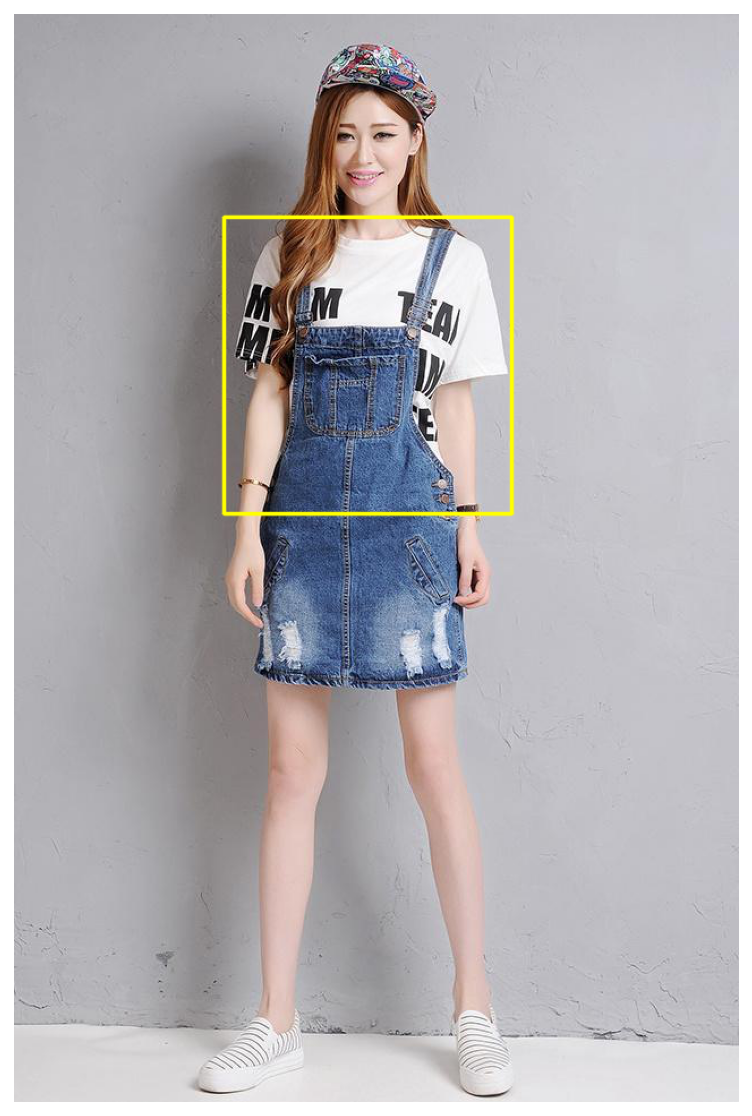

In [0]:
show_image_objects(df.iloc[0])

## Preparamos los datos que mandaremos a entrenar el modelo

In [0]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

Borramos filas que se han corrompido a lo largo del pre-procesado

In [0]:
df.shape

In [0]:
df_new = df.drop(df[(df['x_min'] == 0) & (df['y_min'] == 0.0) & (df['x_max'] == 0.0) & (df['y_max'] == 0.0)].index)

In [0]:
df_new.shape

Partimos los datos en Train y Test

In [0]:
train_df, test_df = train_test_split(
  df_new, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [0]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [0]:
classes = {'short sleeve top','long sleeve top','short sleeve outwear','long sleeve outwear','vest','sling','shorts','trousers','skirt','short sleeve dress','long sleeve dress','vest dress','sling dress'}

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [0]:
!head classes.csv
!head annotations.csv

long sleeve dress,0
long sleeve outwear,1
long sleeve top,2
short sleeve dress,3
short sleeve outwear,4
short sleeve top,5
shorts,6
skirt,7
sling,8
sling dress,9
/content/train/train/image/007745.jpg,173,270,629,672,short sleeve top
/content/train/train/image/048567.jpg,228,275,431,752,vest dress
/content/train/train/image/179174.jpg,163,83,585,224,long sleeve top
/content/train/train/image/132661.jpg,194,340,399,634,sling dress
/content/train/train/image/002866.jpg,263,482,420,703,shorts
/content/train/train/image/184474.jpg,236,329,516,610,short sleeve top
/content/train/train/image/106261.jpg,344,160,544,448,shorts
/content/train/train/image/190265.jpg,194,32,422,250,short sleeve top
/content/train/train/image/174025.jpg,182,129,545,799,trousers
/content/train/train/image/155436.jpg,115,156,341,431,vest


## Cargamos el SSD de Tensorflow
Este modelo sera el que reentrenemos con nuestros datos

In [0]:
os.makedirs("snapshots", exist_ok=True)

In [0]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


## Entrenamos el modelo
Se crearan tantos modelos como "epochs" pongamos, cuantos más epochs mejor, pero tambien habrá que tener cuidado con el sobreentrenamiento.

In [0]:
%cd keras-retinanet/
!keras_retinanet/bin/train.py \
--freeze-backbone \
--random-transform \
--weights {PRETRAINED_MODEL} \
--batch-size 8 \
--steps 800 \
--epochs 20 \
csv annotations.csv classes.csv

[Errno 2] No such file or directory: 'keras-retinanet/'
/content/keras-retinanet
Using TensorFlow backend.
Creating model, this may take a second...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1319: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((3, 3, 256, 117) vs (720, 256, 3, 3)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1319: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((117,) vs (720,)).
  weight_values[i].shape))
2020-04-18 16:23:47.985581: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-18 16:23:48.048229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least o

##Para probar el modelo, seguir el tutorial de maquina virtual a partir de probar el modelo.